In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from tidegauge_functions import read_tidegauge_psmsl

# %matplotlib notebook
%matplotlib inline
# %matplotlib widget

In [3]:
def test_read_tidegauge_monthly(monthly_file):
    column_names=['Year', 'SSH', 'unknown1', 'unknown2']
    df = pd.read_csv(monthly_file, header=None, delimiter=';', names=column_names)
    
    # NaNs
    df['SSH'] = df['SSH'].replace(-99999, np.nan) 
    
    # Datetime operations
    year = df['Year'].astype(int)
    month = ((df['Year'] - year) * 12).astype(int) + 1
    dt = pd.to_datetime(year.astype(str) + month.astype(str), format='%Y%m')
    df = df.rename(columns={'Year': 'YearDec'})
    df.index = pd.DatetimeIndex(dt)

    return df

In [4]:
def plot_OLS_overlay_smoothing(df, res, site, var, data_units, simpletrend=True):
    import matplotlib.pyplot as plt
    from tidegauge_functions import convert_trend_toyearly
    
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='Data', marker='.', linestyle='', color='black')
    
    ## Plot linea model
    if simpletrend:
        ax.plot((df[var].index[0], df[var].index[-1]), 
            (res.params.x1*1 + res.params.const, res.params.x1*df.shape[0] + res.params.const),
               label='Trend', linestyle='--', color='purple')
    else:
            ax.plot(df[var].index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var]))])

    ##
    df[var].interpolate().rolling(window = 12).mean().plot(label='Rolling', color='black')
    
    ## zero line
#     ax.plot((df[var].index[0], df[var].index[-1]), (0, 0), 'k')
    
    ## customize
    trend = convert_trend_toyearly(df, res)
    ax.set_title(f"Trend = {trend:.2f} mm/yr");
    
    ##
    ax.set_ylabel(data_units)
    plt.suptitle(f"{site}")
    plt.legend()
    plt.savefig(f'figs/lineplot_OLS_{site}_trend.png')

In [11]:
df = read_tidegauge_psmsl('data/tidegauge/d570.csv')
yakutat = df.resample('M').mean()
yakutat

,YEAR,MONTH,DAY,SSH
1961-01-31,1961.0,1.0,16.5,2680.533333
1961-02-28,1961.0,2.0,14.5,2689.678571
1961-03-31,1961.0,3.0,16.0,2637.064516
1961-04-30,1961.0,4.0,15.5,2387.833333
1961-05-31,1961.0,5.0,16.0,2402.483871
...,...,...,...,...
2020-02-29,2020.0,2.0,15.0,1867.517241
2020-03-31,2020.0,3.0,16.0,1717.161290
2020-04-30,2020.0,4.0,15.5,1681.766667
2020-05-31,2020.0,5.0,16.0,1780.709677


In [12]:
df = read_tidegauge_psmsl('data/tidegauge/d559.csv')
Sitka = df.resample('M').mean()
Sitka

,YEAR,MONTH,DAY,SSH
1938-05-31,1938.0,5.0,25.5,2976.166667
1938-06-30,1938.0,6.0,15.5,2990.266667
1938-07-31,1938.0,7.0,16.0,2972.032258
1938-08-31,1938.0,8.0,16.0,2933.709677
1938-09-30,1938.0,9.0,15.5,3080.333333
...,...,...,...,...
2020-02-29,2020.0,2.0,15.0,2885.655172
2020-03-31,2020.0,3.0,16.0,2798.258065
2020-04-30,2020.0,4.0,15.5,2735.566667
2020-05-31,2020.0,5.0,16.0,2836.838710


In [13]:
df = read_tidegauge_psmsl('data/tidegauge/d571.csv')
Ketchikan = df.resample('M').mean()
Ketchikan

,YEAR,MONTH,DAY,SSH
1918-10-31,1918.0,10.0,21.5,4478.500000
1918-11-30,1918.0,11.0,15.5,4599.366667
1918-12-31,1918.0,12.0,16.0,4535.000000
1919-01-31,1919.0,1.0,16.0,4620.419355
1919-02-28,1919.0,2.0,14.5,4492.821429
...,...,...,...,...
2020-02-29,2020.0,2.0,15.0,4288.896552
2020-03-31,2020.0,3.0,16.0,4239.483871
2020-04-30,2020.0,4.0,15.5,4163.400000
2020-05-31,2020.0,5.0,16.0,4286.838710


In [5]:
portAlexander = test_read_tidegauge_monthly('data/tidegauge/PortAlexander.csv')
portAlexander

,YearDec,SSH,unknown1,unknown2
Year,,,,
2007-09-01,2007.7083,6927.0,0,0
2007-10-01,2007.7917,7103.0,0,0
2007-11-01,2007.8750,7047.0,0,0
2007-12-01,2007.9583,7101.0,0,0
2008-01-01,2008.0417,7132.0,0,0
...,...,...,...,...
2019-08-01,2019.6250,6876.0,0,0
2019-09-01,2019.7083,6915.0,0,0
2019-10-01,2019.7917,6916.0,0,0


In [6]:
skagway = test_read_tidegauge_monthly('data/tidegauge/Skagway.csv')
skagway

,YearDec,SSH,unknown1,unknown2
Year,,,,
1944-09-01,1944.7083,8117.0,0,0
1944-10-01,1944.7917,8248.0,0,0
1944-11-01,1944.8750,8181.0,0,0
1944-12-01,1944.9583,8148.0,0,0
1945-01-01,1945.0417,8154.0,0,0
...,...,...,...,...
2019-08-01,2019.6250,6677.0,0,0
2019-09-01,2019.7083,6785.0,0,0
2019-10-01,2019.7917,6745.0,0,0


In [14]:
JUNEAU = test_read_tidegauge_monthly('data/tidegauge/405.csv')
JUNEAU

,YearDec,SSH,unknown1,unknown2
Year,,,,
1936-01-01,1936.0417,7427.0,0,0
1936-02-01,1936.1250,7245.0,0,0
1936-03-01,1936.2083,7229.0,0,0
1936-04-01,1936.2917,7229.0,0,0
1936-05-01,1936.3750,7306.0,0,0
...,...,...,...,...
2019-08-01,2019.6250,6166.0,0,0
2019-09-01,2019.7083,6235.0,0,0
2019-10-01,2019.7917,6211.0,0,0


In [8]:
portAlthorp = test_read_tidegauge_monthly('data/tidegauge/PortAlthorp.csv')
portAlthorp

,YearDec,SSH,unknown1,unknown2
Year,,,,
2005-09-01,2005.7083,7046,0,0
2005-10-01,2005.7917,7219,0,0
2005-11-01,2005.8750,7253,0,0
2005-12-01,2005.9583,7283,0,0
2006-01-01,2006.0417,7327,0,0
...,...,...,...,...
2019-08-01,2019.6250,6693,0,0
2019-09-01,2019.7083,6776,0,0
2019-10-01,2019.7917,6785,0,0


                            OLS Regression Results                            
Dep. Variable:                    SSH   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     117.0
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           4.38e-21
Time:                        18:25:56   Log-Likelihood:                -1053.8
No. Observations:                 172   AIC:                             2112.
Df Residuals:                     170   BIC:                             2118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7113.0296     16.924    420.301      0.0

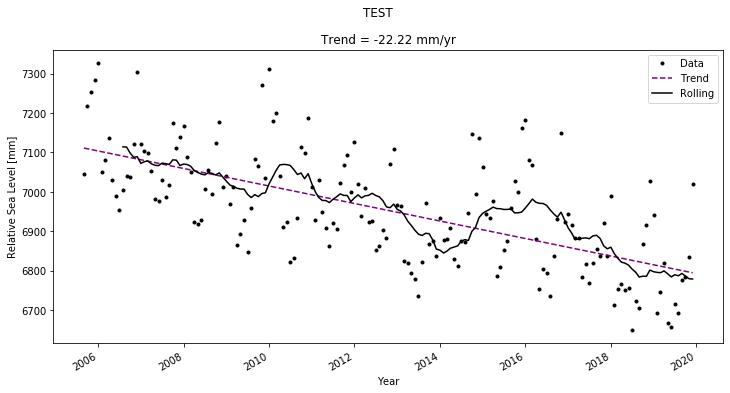

In [15]:
from tidegauge_functions import calc_OLS_tides, convert_trend_toyearly, plot_OLS_overlay


res = calc_OLS_tides(portAlthorp, 'SSH')
print(res.summary())

trend = convert_trend_toyearly(portAlthorp, res)
print(trend)

#Change the 'TEST' string to the name of a site if you want to save a figure.
plot_OLS_overlay_smoothing(portAlthorp, res, 'TEST', 'SSH', 'Relative Sea Level [mm]', simpletrend=True)